In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")
%matplotlib inline
import seaborn as sns
from PIL import Image
from PIL import ImageOps
import numpy as np
sns.set(font="Droid Sans",font_scale = 2)
sns.set_style("white")
sns.set_color_codes("dark")
import pickle as pkl
from tensorflow.examples.tutorials.mnist import input_data
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
plt.rcParams['figure.figsize'] = 6, 8

In [4]:
mnistm = pkl.load(open("mnistm_data.pkl", 'rb'))
shape_train = mnistm['train'].shape
shape_test = mnistm['test'].shape
mnistm_train = mnistm['train']
mnistm_test = mnistm['test']

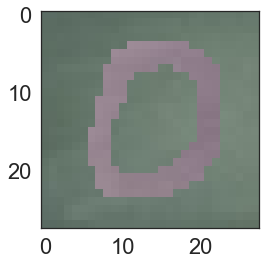

In [13]:
plt.imshow(mnistm_test[10], cmap = "gray")

In [6]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [7]:
mnist_train = (mnist.train.images > 0).reshape(55000, 28, 28, 1).astype(np.uint8) * 255
mnist_train = np.concatenate([mnist_train, mnist_train, mnist_train], 3)
mnist_test = (mnist.test.images > 0).reshape(10000, 28, 28, 1).astype(np.uint8) * 255
mnist_test = np.concatenate([mnist_test, mnist_test, mnist_test], 3)
mnist_train_labels = mnist.train.labels
mnist_test_labels = mnist.test.labels

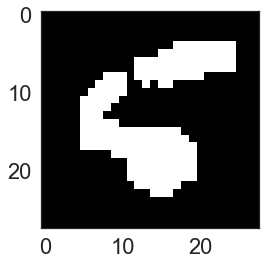

In [14]:
plt.imshow(mnist_test[8], cmap = "gray")

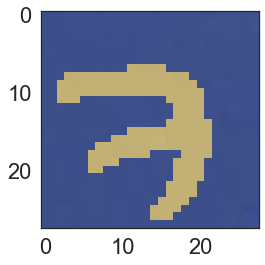

In [9]:
plt.imshow(mnistm_train[0], cmap = "gray")

In [10]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 3), activation='relu',data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4335      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               48128     
__________

In [54]:
model.fit(x=mnist_train, y=mnist_train_labels, batch_size=1024, epochs=10, validation_split=0.15,
                    verbose=1)

Train on 46750 samples, validate on 8250 samples
Epoch 1/10
46750/46750 [==============================] - 34s 733us/step - loss: 8.4463 - acc: 0.4070 - val_loss: 1.5497 - val_acc: 0.7058
Epoch 2/10
46750/46750 [==============================] - 30s 646us/step - loss: 0.9445 - acc: 0.7447 - val_loss: 0.3676 - val_acc: 0.8954
Epoch 3/10
46750/46750 [==============================] - 30s 632us/step - loss: 0.4540 - acc: 0.8696 - val_loss: 0.2591 - val_acc: 0.9223
Epoch 4/10
46750/46750 [==============================] - 31s 659us/step - loss: 0.3353 - acc: 0.9024 - val_loss: 0.1865 - val_acc: 0.9452
Epoch 5/10
46750/46750 [==============================] - 30s 647us/step - loss: 0.2663 - acc: 0.9223 - val_loss: 0.1610 - val_acc: 0.9512
Epoch 6/10
46750/46750 [==============================] - 30s 641us/step - loss: 0.2180 - acc: 0.9361 - val_loss: 0.1402 - val_acc: 0.9568
Epoch 7/10
46750/46750 [==============================] - 31s 659us/step - loss: 0.1887 - acc: 0.9443 - val_loss: 0.1

In [55]:
model.evaluate(mnist_test,mnist_test_labels)

10000/10000 [==============================] - 2s 239us/step


[0.09591215660290327, 0.9736]

In [63]:
model.evaluate(mnistm_test,mnist_test_labels)

10000/10000 [==============================] - 2s 228us/step


[2.1496717124938964, 0.3243]

In [78]:
fe1 = Model(inputs = model.inputs, outputs = model.layers[0].output)
fe1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3_input (InputLayer)  (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


In [79]:
fe1_pred = fe1.predict(np.expand_dims(mnist_test[0],axis = 0))

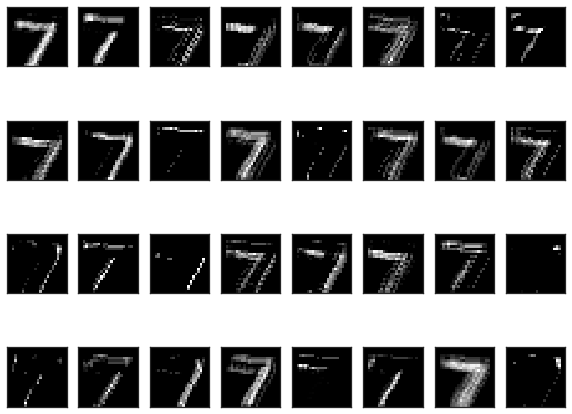

In [80]:
plt.rcParams['figure.figsize'] = 10, 8
length = 4
width = 8
ix = 1
for i in range(length):
    for j in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(length, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(fe1_pred[0, :, :, ix-1], cmap='gray')
        ix += 1

In [93]:
fe1_pred_m = fe1.predict(np.expand_dims(mnistm_test[0],axis = 0))

In [94]:
fe1_pred_t = fe1.predict(np.expand_dims(mnist_train[0],axis = 0))

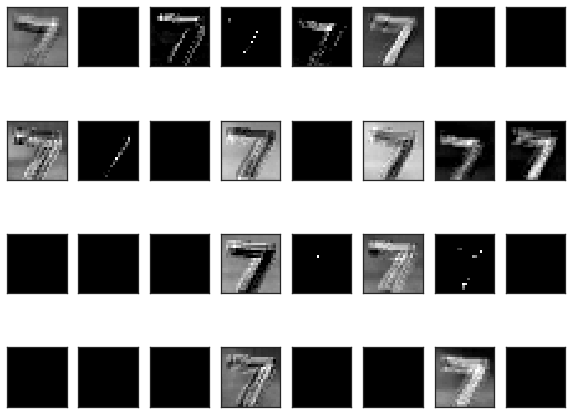

In [87]:
plt.rcParams['figure.figsize'] = 10, 8
length = 4
width = 8
ix = 1
for i in range(length):
    for j in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(length, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(fe1_pred_m[0, :, :, ix-1], cmap='gray')
        ix += 1

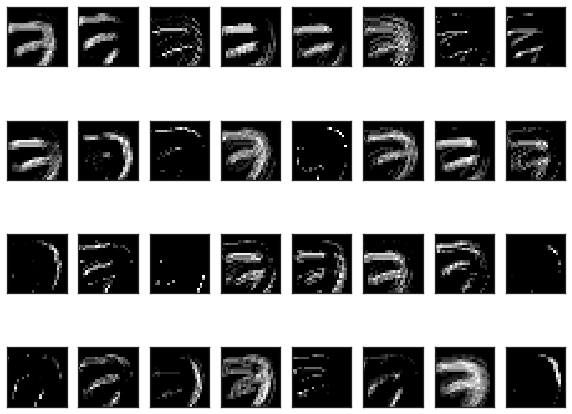

In [89]:
plt.rcParams['figure.figsize'] = 10, 8
length = 4
width = 8
ix = 1
for i in range(length):
    for j in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(length, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(fe1_pred_t[0, :, :, ix-1], cmap='gray')
        ix += 1

In [81]:
fe2 = Model(inputs = model.inputs, outputs = model.layers[2].output)
fe2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3_input (InputLayer)  (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 15)        4335      
Total params: 6,767
Trainable params: 6,767
Non-trainable params: 0
_________________________________________________________________


In [82]:
fe2_pred = fe2.predict(np.expand_dims(mnist_test[0],axis = 0))

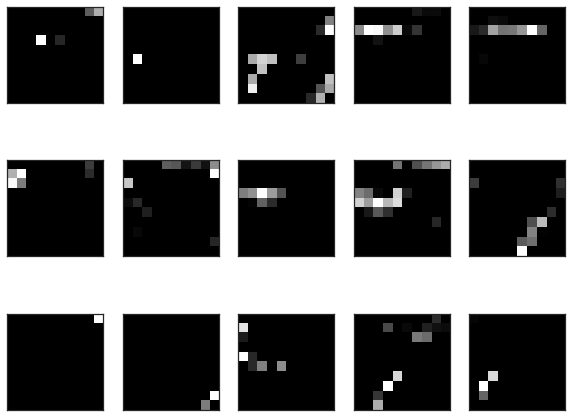

In [84]:
plt.rcParams['figure.figsize'] = 10, 8
length = 3
width = 5
ix = 1
for i in range(length):
    for j in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(length, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(fe2_pred[0, :, :, ix-1], cmap='gray')
        ix += 1

In [95]:
fe2_pred_m = fe2.predict(np.expand_dims(mnistm_test[0],axis = 0))

In [96]:
fe2_pred_t = fe2.predict(np.expand_dims(mnist_train[0],axis = 0))

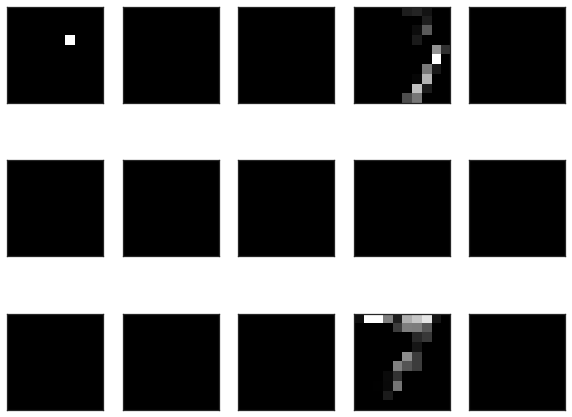

In [98]:
plt.rcParams['figure.figsize'] = 10, 8
length = 3
width = 5
ix = 1
for i in range(length):
    for j in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(length, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(fe2_pred_m[0, :, :, ix-1], cmap='gray')
        ix += 1

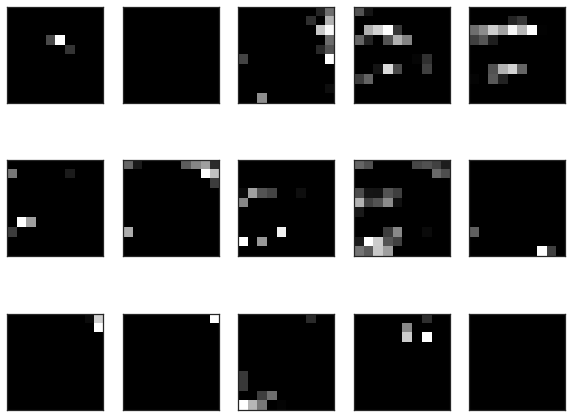

In [99]:
plt.rcParams['figure.figsize'] = 10, 8
length = 3
width = 5
ix = 1
for i in range(length):
    for j in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(length, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(fe2_pred_t[0, :, :, ix-1], cmap='gray')
        ix += 1

In [104]:
model_m = Sequential()
model_m.add(Conv2D(32, (5, 5), input_shape=(28, 28, 3), activation='relu',data_format="channels_last"))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Conv2D(15, (3, 3), activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.2))
model_m.add(Flatten())
model_m.add(Dense(128, activation='relu'))
model_m.add(Dense(50, activation='relu'))
model_m.add(Dense(10, activation='softmax'))
model_m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 32)        2432      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 15)        4335      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               48128     
__________

In [105]:
model_m.fit(x=mnistm_train, y=mnist_train_labels, batch_size=1024, epochs=20, validation_split=0.15,
                    verbose=1)

Train on 46750 samples, validate on 8250 samples
Epoch 1/20
46750/46750 [==============================] - 42s 896us/step - loss: 4.4992 - acc: 0.1098 - val_loss: 2.2697 - val_acc: 0.1347
Epoch 2/20
46750/46750 [==============================] - 43s 929us/step - loss: 2.1170 - acc: 0.2378 - val_loss: 1.7298 - val_acc: 0.4285
Epoch 3/20
46750/46750 [==============================] - 44s 932us/step - loss: 1.6760 - acc: 0.4363 - val_loss: 1.2680 - val_acc: 0.6002
Epoch 4/20
46750/46750 [==============================] - 40s 849us/step - loss: 1.3701 - acc: 0.5504 - val_loss: 1.1396 - val_acc: 0.6555
Epoch 5/20
46750/46750 [==============================] - 42s 889us/step - loss: 1.1822 - acc: 0.6135 - val_loss: 0.8489 - val_acc: 0.7382
Epoch 6/20
46750/46750 [==============================] - 42s 894us/step - loss: 1.0811 - acc: 0.6512 - val_loss: 0.7600 - val_acc: 0.7686
Epoch 7/20
46750/46750 [==============================] - 42s 900us/step - loss: 0.9675 - acc: 0.6892 - val_loss: 0.6

In [107]:
model_m.evaluate(mnistm_test,mnist_test_labels)

10000/10000 [==============================] - 3s 317us/step


[0.2823137403786182, 0.9161]

In [108]:
model_m.evaluate(mnist_test,mnist_test_labels)

10000/10000 [==============================] - 3s 331us/step


[0.1558507113968022, 0.9545]

In [109]:
fe1_m = Model(inputs = model_m.inputs, outputs = model_m.layers[0].output)
fe1_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7_input (InputLayer)  (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


In [116]:
fe1_m_pred = fe1_m.predict(np.expand_dims(mnist_test[0],axis = 0))
fe1_m_pred_m = fe1_m.predict(np.expand_dims(mnistm_test[0],axis = 0))
fe1_m_pred_t = fe1_m.predict(np.expand_dims(mnistm_train[0],axis = 0))

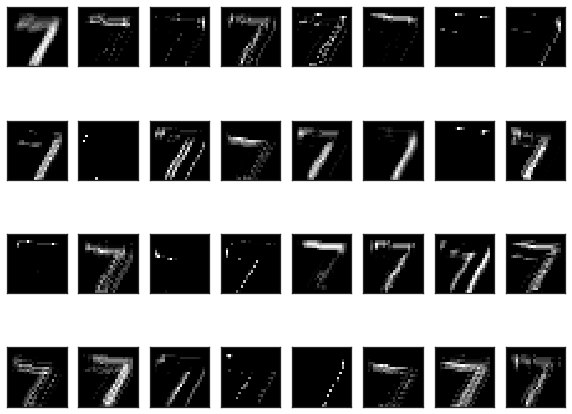

In [111]:
plt.rcParams['figure.figsize'] = 10, 8
length = 4
width = 8
ix = 1
for i in range(length):
    for j in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(length, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(fe1_m_pred[0, :, :, ix-1], cmap='gray')
        ix += 1

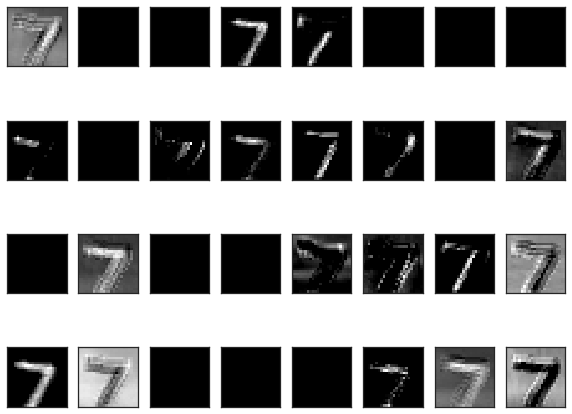

In [114]:
plt.rcParams['figure.figsize'] = 10, 8
length = 4
width = 8
ix = 1
for i in range(length):
    for j in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(length, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(fe1_m_pred_m[0, :, :, ix-1], cmap='gray')
        ix += 1

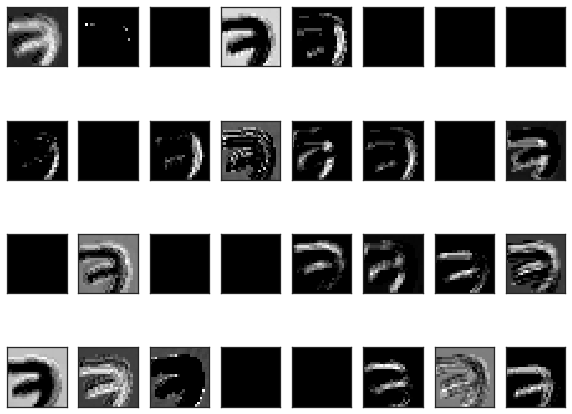

In [117]:
plt.rcParams['figure.figsize'] = 10, 8
length = 4
width = 8
ix = 1
for i in range(length):
    for j in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(length, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(fe1_m_pred_t[0, :, :, ix-1], cmap='gray')
        ix += 1

In [118]:
fe2_m = Model(inputs = model_m.inputs, outputs = model_m.layers[2].output)
fe2_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7_input (InputLayer)  (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        2432      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 15)        4335      
Total params: 6,767
Trainable params: 6,767
Non-trainable params: 0
_________________________________________________________________


In [119]:
fe2_m_pred = fe2_m.predict(np.expand_dims(mnist_test[0],axis = 0))
fe2_m_pred_m = fe2_m.predict(np.expand_dims(mnistm_test[0],axis = 0))
fe2_m_pred_t = fe2_m.predict(np.expand_dims(mnistm_train[0],axis = 0))

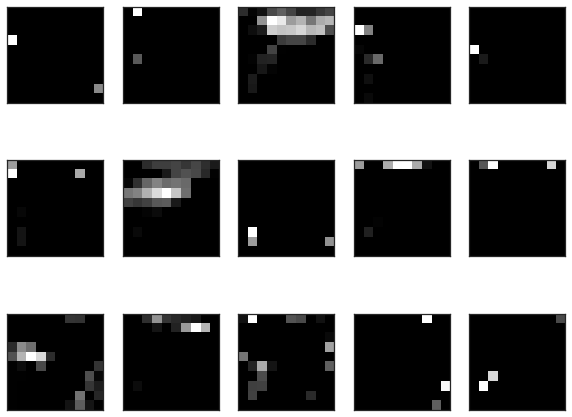

In [120]:
plt.rcParams['figure.figsize'] = 10, 8
length = 3
width = 5
ix = 1
for i in range(length):
    for j in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(length, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(fe2_m_pred[0, :, :, ix-1], cmap='gray')
        ix += 1

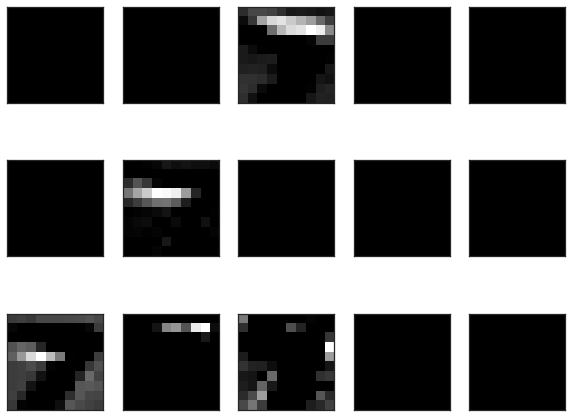

In [121]:
plt.rcParams['figure.figsize'] = 10, 8
length = 3
width = 5
ix = 1
for i in range(length):
    for j in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(length, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(fe2_m_pred_m[0, :, :, ix-1], cmap='gray')
        ix += 1

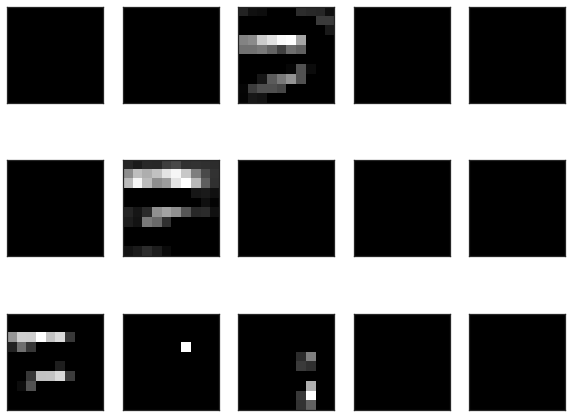

In [122]:
plt.rcParams['figure.figsize'] = 10, 8
length = 3
width = 5
ix = 1
for i in range(length):
    for j in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(length, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(fe2_m_pred_t[0, :, :, ix-1], cmap='gray')
        ix += 1